In [ ]:
f1='/Users/Michael Gleyzer/Documents/Regression_TimeSeries/AAPL.csv'
f2='/Users/Michael Gleyzer/Documents/Regression_TimeSeries/AMZN.csv'
f3='/Users/Michael Gleyzer/Documents/Regression_TimeSeries/V.csv'

In [ ]:
import os
os.chdir(r'C:\Users\Michael Gleyzer\Documents\Regression_TimeSeries')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

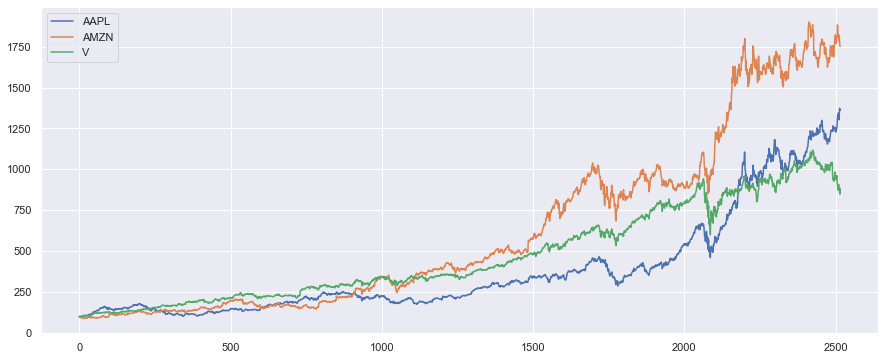

In [ ]:
pf_data = pd.DataFrame()
pf_data["AAPL"] = pd.read_csv(f1)['Adj Close']
pf_data["AMZN"] = pd.read_csv(f2)['Adj Close']
pf_data["V"] = pd.read_csv(f3)['Adj Close']
(pf_data/pf_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [ ]:
log_returns=np.log(pf_data/pf_data.shift(1))
print(f'average annual log returns: \n{log_returns.mean()*250}')
print(f'covariances: \n{log_returns.cov()*250}')
print(f'correlations: \n{log_returns.corr()}')

average annual log returns: 
AAPL    0.259509
AMZN    0.284604
V       0.216810
dtype: float64
covariances: 
          AAPL      AMZN         V
AAPL  0.079538  0.037489  0.032320
AMZN  0.037489  0.090107  0.032658
V     0.032320  0.032658  0.057763
correlations: 
          AAPL      AMZN         V
AAPL  1.000000  0.442835  0.476823
AMZN  0.442835  1.000000  0.452674
V     0.476823  0.452674  1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


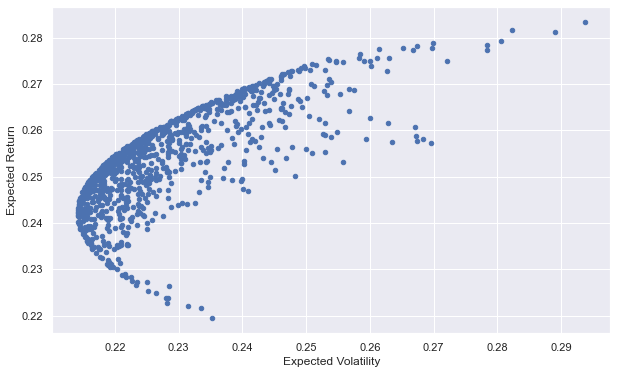

In [ ]:
pfolio_returns=[]
pfolio_volatilities=[]
frontier=dict()
for x in range(1000):
    weights=np.random.random(3)
    weights/=np.sum(weights)
    p_ret=np.sum(weights*log_returns.mean()*250)
    p_vol=np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
    pfolio_returns.append(p_ret)
    pfolio_volatilities.append(p_vol)
    if not (p_vol in frontier.keys() and frontier[p_vol]>p_ret):
        frontier[p_vol]=(p_ret, weights)
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)
portfolios=pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');

In [ ]:
r=[(a, frontier[a]) for a in frontier.keys() if a < 0.245 and a > 0.235]
rrets=[item[1][0] for item in r]
chosen=r[rrets.index((max(rrets)))]
weights=chosen[1][1]
print(f'portfolio weights: AAPL: {weights[0]}, AMZN: {weights[1]}, V: {weights[2]}')
print(f'Expected log annual return: {chosen[1][0]}')
print(f'Expected Volatility: {chosen[0]}')

portfolio weights: AAPL: 0.42269533730393755, AMZN: 0.5358191862344946, V: 0.041485476461567826
Expected log annual return: 0.27118432370159623
Expected Volatility: 0.24443341658691295


In [ ]:
#portfolio return
weights=np.array(weights)
returns = (pf_data/pf_data.shift(1))-1
annual_returns=returns.mean()*250
pfolio=str(round(np.dot(annual_returns, weights), 5)*100)+"%"
pfolio

'31.352999999999998%'

In [ ]:
#variance
pfolio_var=np.dot(weights.T, np.dot(returns.cov()*250, weights))
pfolio_var

0.05993037174063192

In [ ]:
#volatility
pfolio_vol=(np.dot(weights.T, np.dot(returns.cov()*250, weights)))**0.5
pfolio_vol

0.244806804931219

In [ ]:
#diversifiable risk
tickers=['AAPL', 'AMZN', 'V']
dr=pfolio_var
for num in range(len(tickers)):
    dr-=weights[num]**2*returns[tickers[num]].var()*250
dr

0.019540350936280745

In [ ]:
#non diversifiable risk
n_dr_1=pfolio_var-dr
n_dr_1

0.040390020804351175

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [ ]:
aapl_data = pd.read_csv('AAPL.csv')  
print(aapl_data[1:5])

         Date       Open       High        Low      Close  Adj Close  \
1  2011-12-06  14.018214  14.093929  13.906429  13.962500  11.970960   
2  2011-12-07  13.926071  13.962143  13.812857  13.896071  11.914007   
3  2011-12-08  13.980357  14.125000  13.936786  13.952143  11.962084   
4  2011-12-09  14.030357  14.072857  13.965357  14.057857  12.052716   

      Volume  
1  283598000  
2  304746400  
3  376356400  
4  296993200  


In [ ]:
amzn_data = pd.read_csv('AMZN.csv')  

In [ ]:
v_data = pd.read_csv('V.csv')  

In [ ]:
aapl_adj_close = aapl_data['Adj Close'].tolist()
amzn_adj_close = amzn_data['Adj Close'].tolist()
visa_adj_close = v_data['Adj Close'].tolist()
dates = v_data['Date'].tolist()

In [ ]:
## Combine Data for Graphing Behavior, Future Needs

In [ ]:
three_stock_data = pd.DataFrame(list(zip(dates, aapl_adj_close, amzn_adj_close, visa_adj_close)))
print(three_stock_data[0:4])

            0          1           2          3
0  2011-12-05  12.034037  196.240005  22.390175
1  2011-12-06  11.970960  191.990005  22.229357
2  2011-12-07  11.914007  195.320007  22.625591
3  2011-12-08  11.962084  190.479996  22.329576


<AxesSubplot:>

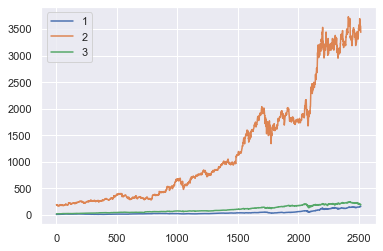

In [ ]:
three_stock_data.plot()

In [ ]:
len(three_stock_data)

2516

In [ ]:
three_stock_data.rename(columns={0: 'Date', 1: 'AAPL', 2: 'AMZN', 3: 'Visa'}, inplace=True)

In [ ]:
print(three_stock_data[1:5])

         Date       AAPL        AMZN       Visa
1  2011-12-06  11.970960  191.990005  22.229357
2  2011-12-07  11.914007  195.320007  22.625591
3  2011-12-08  11.962084  190.479996  22.329576
4  2011-12-09  12.052716  193.029999  22.653564


In [ ]:
## Check Stationarity of Each Time Series Individually

In [ ]:
appl_data = three_stock_data[['Date', 'AAPL']]

In [ ]:
amzn_data = three_stock_data[['Date', 'AMZN']]

In [ ]:
visa_data = three_stock_data[['Date', 'Visa']]

In [ ]:
len(appl_data)

2516

In [ ]:
print(appl_data[1:5])

         Date       AAPL
1  2011-12-06  11.970960
2  2011-12-07  11.914007
3  2011-12-08  11.962084
4  2011-12-09  12.052716


In [ ]:
len(amzn_data)

2516

In [ ]:
len(visa_data)

2516

In [ ]:
## Split Data, Check Mean and Variance

In [ ]:
## Apple Data

In [ ]:
aapl_1=appl_data['AAPL'][0:1257]
aapl_2=appl_data['AAPL'][1258:2516]

In [ ]:
aapl_1.mean()

20.770856614160717

In [ ]:
aapl_2.mean()

71.24023096979327

In [ ]:
aapl_1.var()

25.565604518825527

In [ ]:
aapl_2.var()

1560.3096976977774

In [ ]:
aapl_time_series = appl_data['AAPL']
print(aapl_time_series[0:5])

0    12.034037
1    11.970960
2    11.914007
3    11.962084
4    12.052716
Name: AAPL, dtype: float64


In [ ]:
## Amazon Data

In [ ]:
amzn_1=amzn_data['AMZN'][0:1257]
amzn_2=amzn_data['AMZN'][1258:2516]

In [ ]:
amzn_1.mean()

396.9265558512329

In [ ]:
amzn_2.mean()

2045.4031147273436

In [ ]:
amzn_1.var()

32038.55292371845

In [ ]:
amzn_2.var()

768451.3155908188

In [ ]:
amzn_time_series = amzn_data['AMZN']
print(amzn_time_series[0:5])

0    196.240005
1    191.990005
2    195.320007
3    190.479996
4    193.029999
Name: AMZN, dtype: float64


In [ ]:
## Visa Data

In [ ]:
visa_1=visa_data['Visa'][0:1257]
visa_2=visa_data['Visa'][1258:2516]

In [ ]:
visa_1.mean()

52.74437878918055

In [ ]:
visa_2.mean()

158.54766016136733

In [ ]:
visa_1.var()

295.9419881998042

In [ ]:
visa_2.var()

2222.1202429051723

In [ ]:
visa_time_series = visa_data['Visa']
print(visa_time_series[0:5])

0    22.390175
1    22.229357
2    22.625591
3    22.329576
4    22.653564
Name: Visa, dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [ ]:
sTest_1_appl = StationarityTests()
sTest_1_appl.ADF_Stationarity_Test(aapl_time_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_1_appl.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic         2.736165
P-Value                    0.999088
# Lags Used               27.000000
# Observations Used     2488.000000
Critical Value (1%)       -3.432981
Critical Value (5%)       -2.862702
Critical Value (10%)      -2.567389
dtype: float64
Is the time series stationary? False


In [ ]:
sTest_2_amzn = StationarityTests()
sTest_2_amzn.ADF_Stationarity_Test(amzn_time_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_2_amzn.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic         1.353336
P-Value                    0.996891
# Lags Used               27.000000
# Observations Used     2488.000000
Critical Value (1%)       -3.432981
Critical Value (5%)       -2.862702
Critical Value (10%)      -2.567389
dtype: float64
Is the time series stationary? False


In [ ]:
sTest_3_visa = StationarityTests()
sTest_3_visa.ADF_Stationarity_Test(visa_time_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_3_visa.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -0.479055
P-Value                    0.896039
# Lags Used               27.000000
# Observations Used     2488.000000
Critical Value (1%)       -3.432981
Critical Value (5%)       -2.862702
Critical Value (10%)      -2.567389
dtype: float64
Is the time series stationary? False


In [ ]:
## Work to Try to Make the Series' Stationary

In [ ]:
## Apple Differencing

<AxesSubplot:>

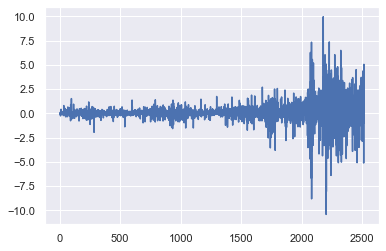

In [ ]:
aapl_data['AAPL_diff'] = appl_data['AAPL'] - appl_data['AAPL'].shift(1)
aapl_data['AAPL_diff'].dropna().plot()

In [ ]:
aapl_data_diff_series = aapl_data['AAPL_diff'].dropna()
print(aapl_data_diff_series[1:6])

2   -0.056953
3    0.048077
4    0.090632
5   -0.054504
6   -0.092776
Name: AAPL_diff, dtype: float64


In [ ]:
sTest_1_appl_diff = StationarityTests()
sTest_1_appl_diff.ADF_Stationarity_Test(aapl_data_diff_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_1_appl_diff.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -9.944962e+00
P-Value                 2.604269e-17
# Lags Used             2.600000e+01
# Observations Used     2.488000e+03
Critical Value (1%)    -3.432981e+00
Critical Value (5%)    -2.862702e+00
Critical Value (10%)   -2.567389e+00
dtype: float64
Is the time series stationary? True


In [ ]:
## Amazon Differencing
## I used log here because of how exponential the growth in Amazon stock was in this case.

<ipython-input-158-e681e1ac3d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_data['AMZN_Log'] = np.log(amzn_data['AMZN'])


<AxesSubplot:>

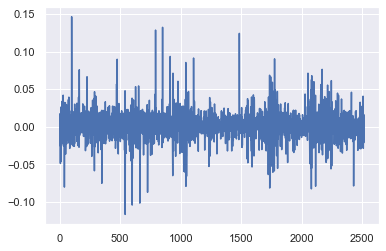

In [ ]:
amzn_data['AMZN_Log'] = np.log(amzn_data['AMZN'])
amzn_data['AMZN_Log_Diff'] = amzn_data['AMZN_Log']  - amzn_data['AMZN_Log'].shift(1)
amzn_data['AMZN_Log_Diff'].dropna().plot()

In [ ]:
amzn_data_diff_series = amzn_data['AMZN_Log_Diff'].dropna()
print(amzn_data_diff_series[1:6])

2    0.017196
3   -0.025092
4    0.013298
5   -0.018351
6   -0.048708
Name: AMZN_Log_Diff, dtype: float64


In [ ]:
sTest_2_amzn_diff = StationarityTests()
sTest_2_amzn_diff.ADF_Stationarity_Test(amzn_data_diff_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_2_amzn_diff.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.684079e+01
P-Value                 1.138547e-29
# Lags Used             8.000000e+00
# Observations Used     2.506000e+03
Critical Value (1%)    -3.432962e+00
Critical Value (5%)    -2.862694e+00
Critical Value (10%)   -2.567384e+00
dtype: float64
Is the time series stationary? True


In [ ]:
## Visa Differencing

<ipython-input-162-f2e82ad85fcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visa_data['Visa_diff'] = visa_data['Visa'] - visa_data['Visa'].shift(1)


<AxesSubplot:>

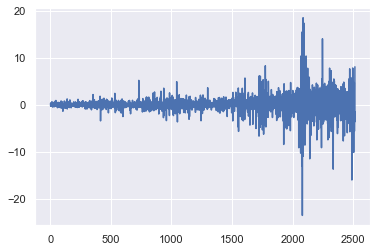

In [ ]:
visa_data['Visa_diff'] = visa_data['Visa'] - visa_data['Visa'].shift(1)
visa_data['Visa_diff'].dropna().plot()

In [ ]:
visa_data_diff_series = visa_data['Visa_diff'].dropna()
print(visa_data_diff_series[1:6])

2    0.396234
3   -0.296015
4    0.323988
5   -0.062933
6   -0.235412
Name: Visa_diff, dtype: float64


In [ ]:
sTest_3_visa_diff = StationarityTests()
sTest_3_visa_diff.ADF_Stationarity_Test(visa_data_diff_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest_3_visa_diff.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -9.569050e+00
P-Value                 2.314690e-16
# Lags Used             2.600000e+01
# Observations Used     2.488000e+03
Critical Value (1%)    -3.432981e+00
Critical Value (5%)    -2.862702e+00
Critical Value (10%)   -2.567389e+00
dtype: float64
Is the time series stationary? True


In [ ]:
aapl_data = aapl_data.dropna()
visa_data = visa_data.dropna()
amzn_data = amzn_data.dropna()

In [ ]:
amzn_data

,Date,AMZN,AMZN_Log,AMZN_Log_Diff
1,2011-12-06,191.990005,5.257443,-0.021895
2,2011-12-07,195.320007,5.274639,0.017196
3,2011-12-08,190.479996,5.249547,-0.025092
4,2011-12-09,193.029999,5.262846,0.013298
5,2011-12-12,189.520004,5.244495,-0.018351
...,...,...,...,...
2511,2021-11-26,3504.560059,8.161820,-0.021412
2512,2021-11-29,3561.570068,8.177957,0.016136
2513,2021-11-30,3507.070068,8.162536,-0.015421
2514,2021-12-01,3443.719971,8.144308,-0.018229


In [ ]:
visa_data

,Date,Visa,Visa_diff
1,2011-12-06,22.229357,-0.160818
2,2011-12-07,22.625591,0.396234
3,2011-12-08,22.329576,-0.296015
4,2011-12-09,22.653564,0.323988
5,2011-12-12,22.590631,-0.062933
...,...,...,...
2511,2021-11-26,197.649994,-5.600006
2512,2021-11-29,196.289993,-1.360001
2513,2021-11-30,193.770004,-2.519989
2514,2021-12-01,190.160004,-3.610000


In [ ]:
aapl_data

,Date,Open,High,Low,Close,Adj Close,Volume,AAPL_diff
1,2011-12-06,14.018214,14.093929,13.906429,13.962500,11.970960,283598000,-0.063077
2,2011-12-07,13.926071,13.962143,13.812857,13.896071,11.914007,304746400,-0.056953
3,2011-12-08,13.980357,14.125000,13.936786,13.952143,11.962084,376356400,0.048077
4,2011-12-09,14.030357,14.072857,13.965357,14.057857,12.052716,296993200,0.090632
5,2011-12-12,13.988571,14.067857,13.908929,13.994286,11.998212,301067200,-0.054504
...,...,...,...,...,...,...,...,...
2511,2021-11-26,159.570007,160.449997,156.360001,156.809998,156.809998,76959800,-5.130004
2512,2021-11-29,159.369995,161.190002,158.789993,160.240005,160.240005,88748200,3.430007
2513,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.300003,174048100,5.059998
2514,2021-12-01,167.479996,170.300003,164.529999,164.770004,164.770004,152052500,-0.529999


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF and PACF plots of all the time series. Looking at canddiates for the p and q terms


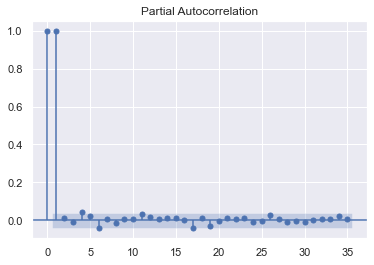

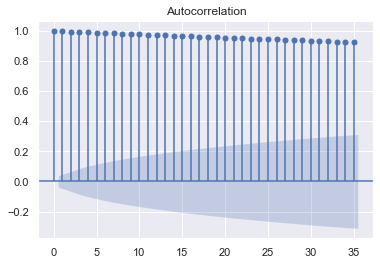

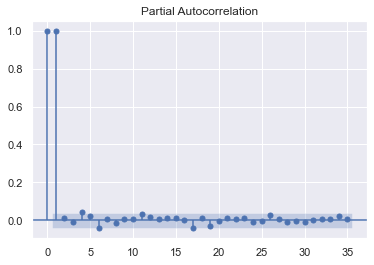

In [ ]:
plot_acf(aapl_time_series)
plot_pacf(aapl_time_series)

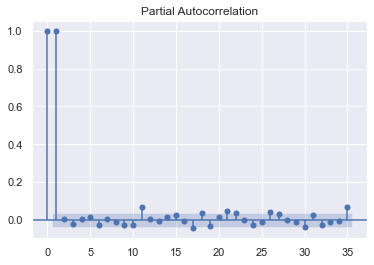

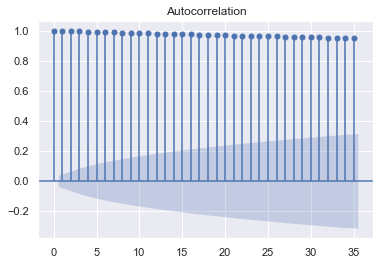

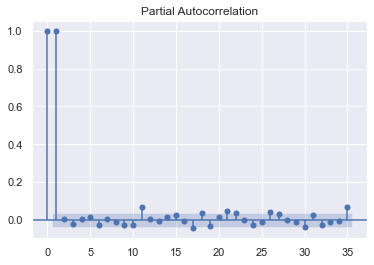

In [ ]:
plot_acf(amzn_time_series)
plot_pacf(amzn_time_series)

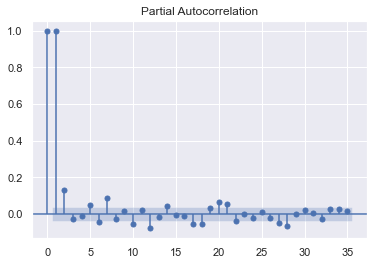

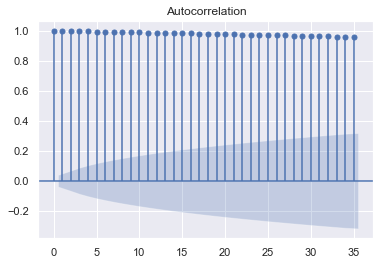

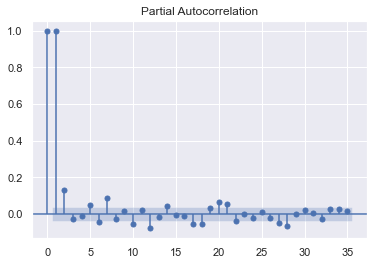

In [ ]:
plot_acf(visa_time_series)
plot_pacf(visa_time_series)

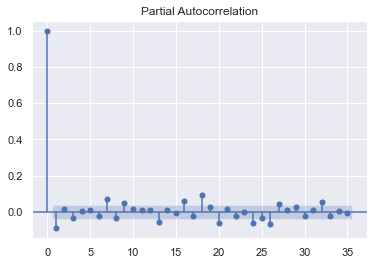

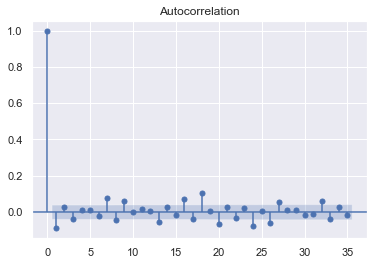

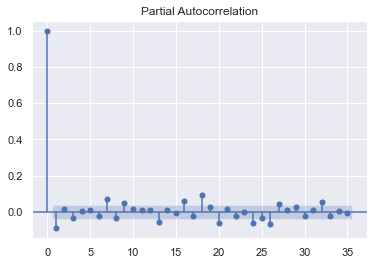

In [ ]:
plot_acf(aapl_data_diff_series)
plot_pacf(aapl_data_diff_series)

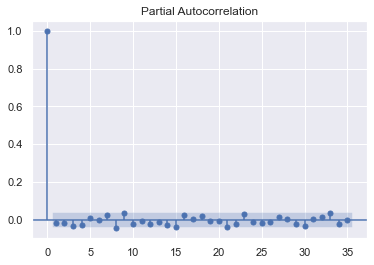

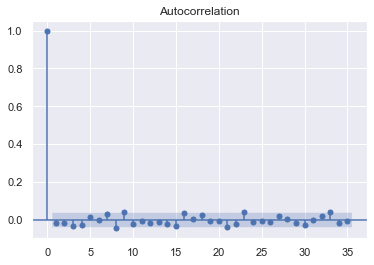

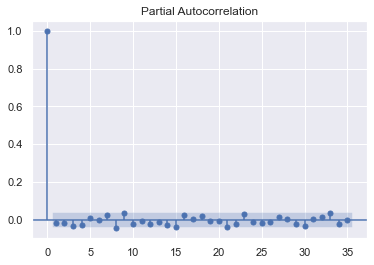

In [ ]:
plot_acf(amzn_data_diff_series)
plot_pacf(amzn_data_diff_series)

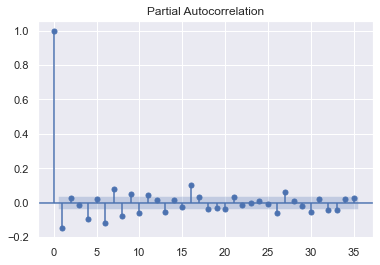

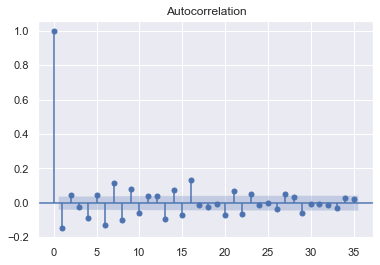

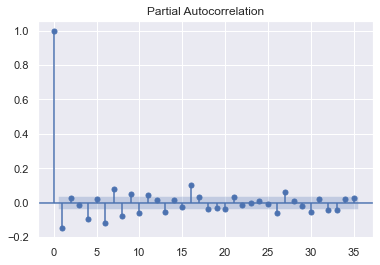

In [ ]:
plot_acf(visa_data_diff_series)
plot_pacf(visa_data_diff_series)

Possible Candidate Models for : 

AAPL : (1,1,1) 
AMZN : (0,1,0)
VISA:  (1,1,1) 

### Choosing the order of Apple's arima model. (1,1,0) looks like a promising candidate


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
aapl_df = aapl_time_series.to_frame()

mod = ARIMA(aapl_df['AAPL'],order=(1,1,1))
aapl_fit1 = mod.fit()
print("Model 1 for Apple")
print(aapl_fit1.summary())

mod2 = ARIMA(aapl_df['AAPL'],order=(0,1,1))
aapl_fit2 = mod2.fit()
print("Model 2 for Apple")
print(aapl_fit2.summary())

mod3 = ARIMA(aapl_df['AAPL'],order=(1,1,0))
aapl_fit3 = mod3.fit()
print("Model 3 for Apple")
print(aapl_fit3.summary())









C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

Model 1 for Apple
                             ARIMA Model Results                              
Dep. Variable:                 D.AAPL   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3862.154
Method:                       css-mle   S.D. of innovations              1.124
Date:                Wed, 08 Dec 2021   AIC                           7732.309
Time:                        14:00:05   BIC                           7755.629
Sample:                             1   HQIC                          7740.773
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0603      0.021      2.874      0.004       0.019       0.102
ar.L1.D.AAPL    -0.3960      0.184     -2.147      0.032      -0.757      -0.035
ma.L1.D.AAPL     0.3082   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Choosing the order of Amazon's arima model. (1,1,1) looks promising. 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
amzn_df = amzn_time_series.to_frame()

mod = ARIMA(amzn_df['AMZN'],order=(1,1,1))
amzn_fit1 = mod.fit()
print("Model 1 for Amazon")
print(amzn_fit1.summary())

mod2 = ARIMA(amzn_df['AMZN'],order=(0,1,0))
amzn_fit2 = mod2.fit()
print("Model 2 for Amazon")
print(amzn_fit2.summary())

mod3 = ARIMA(amzn_df['AMZN'],order=(0,1,1))
amzn_fit3 = mod3.fit()
print("Model 3 for Amazon")
print(amzn_fit3.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Model 1 for Amazon
                             ARIMA Model Results                              
Dep. Variable:                 D.AMZN   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12106.992
Method:                       css-mle   S.D. of innovations             29.814
Date:                Wed, 08 Dec 2021   AIC                          24221.983
Time:                        15:45:36   BIC                          24245.303
Sample:                             1   HQIC                         24230.447
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3003      0.439      2.962      0.003       0.440       2.161
ar.L1.D.AMZN     0.8995      0.041     22.002      0.000       0.819       0.980
ma.L1.D.AMZN    -0.9259  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

### Choosing the order of the VISA arima model. Both (1,1,1) , (1,1,0) look promising

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
visa_df = visa_time_series.to_frame()
print(visa_df)

mod = ARIMA(visa_df['Visa'],order=(1,1,1))
visa_fit1 = mod.fit()
print("Model 1 for Visa")
print(fit.summary())

mod2 = ARIMA(visa_df['Visa'],order=(0,1,0))
visa_fit2 = mod2.fit()
print("Model 2 for Visa")
print(fit2.summary())

mod3 = ARIMA(visa_df['Visa'],order=(0,1,1))
visa_fit3 = mod3.fit()
print("Model 3 for Visa")
print(fit3.summary())

mod4 = ARIMA(visa_df['Visa'],order=(1,1,0))
visa_fit4 = mod4.fit()
print("Model 4 for Visa")
print(fit4.summary())


            Visa
0      22.390175
1      22.229357
2      22.625591
3      22.329576
4      22.653564
...          ...
2511  197.649994
2512  196.289993
2513  193.770004
2514  190.160004
2515  198.289993

[2516 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Model 1 for Visa
                             ARIMA Model Results                              
Dep. Variable:                 D.Visa   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5371.393
Method:                       css-mle   S.D. of innovations              2.048
Date:                Wed, 08 Dec 2021   AIC                          10750.787
Time:                        16:29:52   BIC                          10774.107
Sample:                             1   HQIC                         10759.251
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0696      0.036      1.924      0.054      -0.001       0.140
ar.L1.D.Visa    -0.2931      0.102     -2.873      0.004      -0.493      -0.093
ma.L1.D.Visa     0.1452    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### Residual Analysis

In [ ]:
### AAPL Residual Analysis 

,0
count,2515.000000
mean,-0.000003
std,1.124014
min,-10.848300
25%,-0.267593
50%,-0.038461
75%,0.256598
max,9.943297


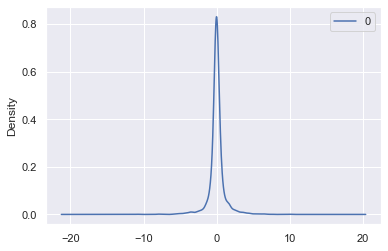

In [ ]:
# AAPL Residuals ARIMA(1,1,1)

aapl_residuals = aapl_fit1.resid
aapl_residuals = aapl_residuals.to_frame()
aapl_residuals.plot(kind = "kde")
aapl_residuals.describe()

,0
count,2515.000000
mean,-0.000005
std,1.124483
min,-10.707105
25%,-0.269018
50%,-0.037794
75%,0.254704
max,10.022121


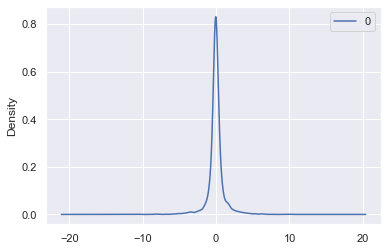

In [ ]:
# AAPL Residuals ARIMA(0,1,1)

aapl_residuals2 = aapl_fit2.resid
aapl_residuals2 = aapl_residuals2.to_frame()
aapl_residuals2.plot(kind = "kde")

aapl_residuals2.describe()

,0
count,2515.000000
mean,-0.000005
std,1.124333
min,-10.757842
25%,-0.269658
50%,-0.036855
75%,0.252802
max,10.012197


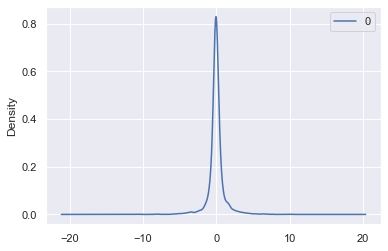

In [ ]:
# AAPL Residuals ARIMA(1,1,0) 

aapl_residuals3 = aapl_fit3.resid
aapl_residuals3 = aapl_residuals3.to_frame()
aapl_residuals3.plot(kind = "kde")
aapl_residuals3.describe()

In [ ]:
#AMZN Residual Analysis 

,0
count,2515.000000
mean,-0.003873
std,29.819680
min,-273.435040
25%,-6.533851
50%,-0.827380
75%,6.733644
max,235.801171


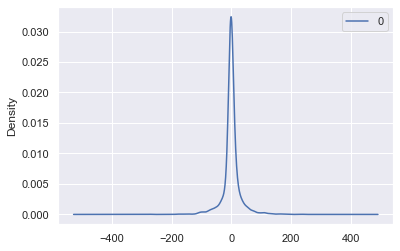

In [ ]:
# Residuals for AMZN Arima(1,1,1)

amzn_residuals = amzn_fit1.resid
amzn_residuals = amzn_residuals.to_frame()
amzn_residuals.plot(kind = "kde")
amzn_residuals.describe()

,0
count,2.515000e+03
mean,-1.248041e-15
std,2.987412e+01
min,-2.736185e+02
25%,-6.368756e+00
50%,-6.187177e-01
75%,6.831294e+00
max,2.335814e+02


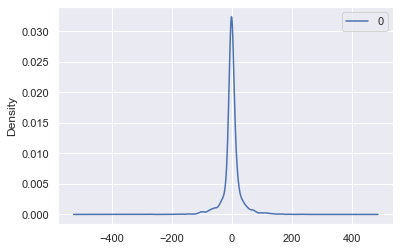

In [ ]:
# Residuals for AMZN Arima(0,1,0)

amzn_residuals2 = amzn_fit2.resid
amzn_residuals2 = amzn_residuals2.to_frame()
amzn_residuals2.plot(kind = "kde")
amzn_residuals2.describe()

,0
count,2515.000000
mean,-0.000053
std,29.864532
min,-274.428831
25%,-6.286143
50%,-0.643029
75%,6.741312
max,232.570003


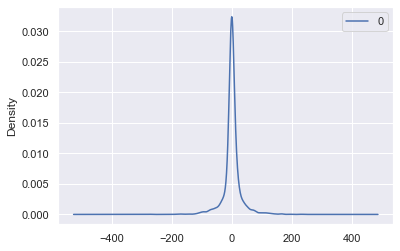

In [ ]:
# Residuals for AMZN Arima(0,1,1)

amzn_residuals3 = amzn_fit3.resid
amzn_residuals3 = amzn_residuals3.to_frame()
amzn_residuals3.plot(kind = "kde")
amzn_residuals3.describe()

In [ ]:
# VISA Residual Analysis 

,0
count,2515.000000
mean,-0.000015
std,2.048276
min,-21.099920
25%,-0.528266
50%,0.029265
75%,0.633037
max,17.018100


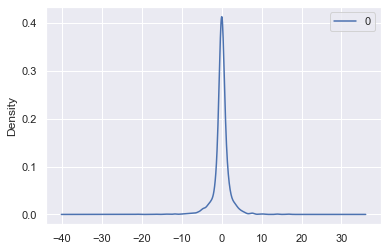

In [ ]:
#Visa residuals model(1,1,1)

visa_residuals = visa_fit1.resid
visa_residuals = visa_residuals.to_frame()
visa_residuals.plot(kind = "kde")
visa_residuals.describe()

,0
count,2.515000e+03
mean,-5.170152e-16
std,2.072501e+00
min,-2.363377e+01
25%,-5.168533e-01
50%,2.988271e-02
75%,6.089537e-01
max,1.851797e+01


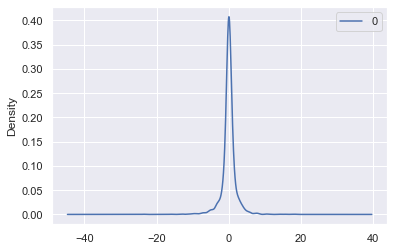

In [ ]:
#visa residuals model(0,1,0)

visa_residuals2 = visa_fit2.resid
visa_residuals2 = visa_residuals2.to_frame()
visa_residuals2.plot(kind = "kde")
visa_residuals2.describe()

,0
count,2515.000000
mean,-0.000012
std,2.050344
min,-21.705578
25%,-0.511170
50%,0.024392
75%,0.629203
max,16.840235


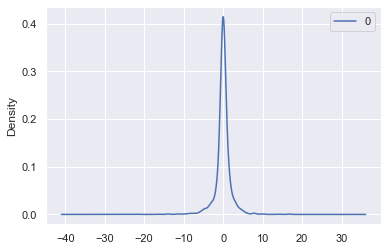

In [ ]:
#visa residuals model(0,1,1) 

visa_residuals3 = visa_fit3.resid
visa_residuals3 = visa_residuals3.to_frame()
visa_residuals3.plot(kind = "kde")
visa_residuals3.describe()

,0
count,2515.000000
mean,-0.000014
std,2.048916
min,-21.293825
25%,-0.518565
50%,0.027477
75%,0.632384
max,16.853171


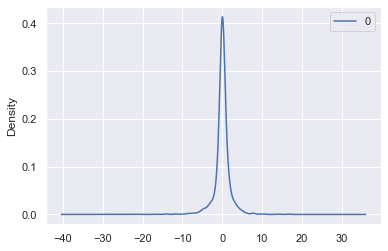

In [ ]:
visa_residuals4 = visa_fit4.resid
visa_residuals4 = visa_residuals4.to_frame()
visa_residuals4.plot(kind = "kde")
visa_residuals4.describe()